In [2]:
#Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# ------------------------------------------------------------------------------
from scipy.stats import shapiro, kstest

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("files/world_data_full_apply_nulos.csv", index_col = 0)
df.head()

,country,density,abbreviation,agricultural_land,land_area,armed_forces_size,birth_rate,calling_code,capital/major_city,co2-emissions,cpi,cpi_change,currency-code,fertility_rate,forested_area,gasoline_price,gdp,gross_primary_education_enrollment,gross_tertiary_education_enrollment,infant_mortality,largest_city,life_expectancy,maternal_mortality_ratio,minimum_wage,official_language,out_of_pocket_health_expenditure,physicians_per_thousand,population,population_labor_force_participation,tax_revenue,total_tax_rate,unemployment_rate,urban_population,latitude,longitude,continent
0,Afghanistan,60.0,AF,58.1,652.230,323.0,32.49,93.0,Kabul,8.672,149.90,2.3,AFN,4.47,2.1,0.70,1.910135e+10,104.0,9.7,47.9,Kabul,64.5,638.0,0.43,Pashto,78.4,0.28,NaN,48.9,9.3,71.4,11.12,NaN,33.939110,67.709953,Asia
1,Albania,105.0,AL,43.1,28.748,9.0,11.78,355.0,Tirana,4.536,119.05,1.4,ALL,1.62,28.1,1.36,1.527808e+10,107.0,55.0,7.8,Tirana,78.5,15.0,1.12,Albanian,56.9,1.20,NaN,55.7,18.6,36.6,12.33,NaN,41.153332,20.168331,Europe
2,Algeria,18.0,DZ,17.4,NaN,317.0,24.28,213.0,Algiers,150.006,151.36,2.0,DZD,3.02,0.8,0.28,1.699882e+11,109.9,51.4,20.1,Algiers,76.7,112.0,0.95,Arabic,28.1,1.72,NaN,41.2,37.2,66.1,11.70,NaN,28.033886,1.659626,Africa
3,Andorra,164.0,AD,40.0,468.000,NaN,7.20,376.0,Andorra la Vella,469.000,NaN,NaN,EUR,1.27,34.0,1.51,3.154058e+09,106.4,NaN,2.7,Andorra la Vella,NaN,NaN,6.63,Catalan,36.4,3.33,77.142,NaN,NaN,NaN,NaN,67.873,42.506285,1.521801,Europe
4,Angola,26.0,AO,47.5,NaN,117.0,40.73,244.0,Luanda,34.693,261.73,17.1,AOA,5.52,46.3,0.97,9.463542e+10,113.5,9.3,51.6,Luanda,60.8,241.0,0.71,Portuguese,33.4,0.21,NaN,77.5,9.2,49.1,6.89,NaN,-11.202692,17.873887,Africa


In [ ]:
#Calcula las siguientes estadísticas descriptivas para las variables numéricas:

df.describe().T

,count,mean,std,min,25%,50%,75%,max
density,195.0,1.345045e+02,1.573068e+02,1.265000e+00,2.616850e+01,8.300000e+01,1.655000e+02,8.470000e+02
agricultural_land,188.0,3.911755e+01,2.178305e+01,6.000000e-01,2.170000e+01,3.960000e+01,5.537500e+01,8.260000e+01
land_area,165.0,2.552127e+02,2.583850e+02,0.000000e+00,4.127700e+01,1.484600e+02,4.300000e+02,9.640000e+02
armed_forces_size,166.0,1.037831e+02,1.671580e+02,0.000000e+00,1.025000e+01,2.850000e+01,1.282500e+02,9.360000e+02
birth_rate,189.0,2.021497e+01,9.945774e+00,5.900000e+00,1.130000e+01,1.795000e+01,2.875000e+01,4.608000e+01
calling_code,194.0,3.605464e+02,3.232364e+02,1.000000e+00,8.250000e+01,2.555000e+02,5.067500e+02,1.876000e+03
co2-emissions,183.0,1.259155e+02,1.817949e+02,1.016000e+00,7.600000e+00,3.447700e+01,1.850305e+02,7.279730e+02
cpi,175.0,1.441936e+02,5.478400e+01,9.903000e+01,1.136700e+02,1.247400e+02,1.559250e+02,5.509300e+02
cpi_change,179.0,6.722346e+00,2.445041e+01,-4.300000e+00,1.000000e+00,2.300000e+00,4.250000e+00,2.549000e+02
fertility_rate,188.0,2.698138e+00,1.282267e+00,9.800000e-01,1.705000e+00,2.245000e+00,3.597500e+00,6.910000e+00


In [21]:
#Identifica el país con la mayor densidad de población y el país con la menor población en el conjunto de datos.

df.groupby("country")[["density", "population"]].agg(["max", "min"]).reset_index()




country density        population        
                     max    min        max     min
0    Afghanistan    60.0   60.0        NaN     NaN
1        Albania   105.0  105.0        NaN     NaN
2        Algeria    18.0   18.0        NaN     NaN
3        Andorra   164.0  164.0     77.142  77.142
4         Angola    26.0   26.0        NaN     NaN
..           ...     ...    ...        ...     ...
190    Venezuela    32.0   32.0        NaN     NaN
191      Vietnam   314.0  314.0        NaN     NaN
192        Yemen    56.0   56.0        NaN     NaN
193       Zambia    25.0   25.0        NaN     NaN
194     Zimbabwe    38.0   38.0        NaN     NaN

[195 rows x 5 columns]

In [22]:
print(df[["country", "density"]].max())

country    Zimbabwe
density       847.0
dtype: object


In [23]:
print(df[["country","population"]].min())

country       Afghanistan
population         10.084
dtype: object


In [26]:
#Calcula la tasa promedio de natalidad (birth_rate) para todos los países en el conjunto de datos.

promedio_birth_rate= df["birth_rate"].mean()

print(f"El promedio de natalidad: {np.round(promedio_birth_rate, 2)}")

El promedio de natalidad: 20.21


In [28]:
# Realiza un análisis de la mortalidad infantil (infant_mortality) y clasifica los países en tres categorías: baja, moderada y alta mortalidad infantil.

Q1 = np.nanpercentile(df["infant_mortality"], 25)
Q3 = np.nanpercentile(df["infant_mortality"], 75)
Q2= df["infant_mortality"].median()

In [33]:
def clasificar_mortalidad(valor): 
    if valor <= Q1: 
        return 'Baja mortalidad infantil' 
    elif valor <= Q2: 
        return 'Mortalidad infantil moderada' 
    else: 
        return 'Alta mortalidad infantil' 
    
df["indice_mortalidad"]=df["infant_mortality"].apply(clasificar_mortalidad)

df[["country", "infant_mortality", "indice_mortalidad"]].head()

,country,infant_mortality,indice_mortalidad
0,Afghanistan,47.9,Alta mortalidad infantil
1,Albania,7.8,Mortalidad infantil moderada
2,Algeria,20.1,Alta mortalidad infantil
3,Andorra,2.7,Baja mortalidad infantil
4,Angola,51.6,Alta mortalidad infantil


In [ ]:
# Otra forma más correcta
etiquetas = ['Baja', 'Moderada', 'Alta']  
df['Categoría Mortalidad'] = pd.cut(df['infant_mortality'], bins=3, labels=etiquetas)
df[["country", "Categoría Mortalidad"]]

,country,Categoría Mortalidad
0,Afghanistan,Moderada
1,Albania,Baja
2,Algeria,Baja
3,Andorra,Baja
4,Angola,Moderada
...,...,...
190,Venezuela,Baja
191,Vietnam,Baja
192,Yemen,Moderada
193,Zambia,Moderada


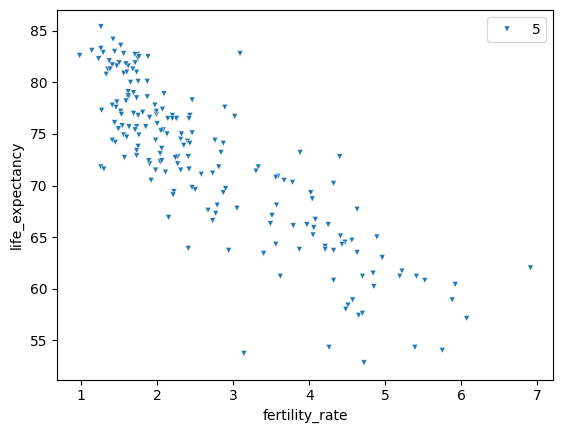

In [35]:
# Calcula la correlación entre las variables de "fertility_rate" y "life_expectancy". Interpreta la relación entre estas dos variables. ¿Qué tipo de correlación hay? Explica la razón de esta relación

sns.scatterplot(x = "fertility_rate", 
                y = "life_expectancy", 
                data = df, 
                size = 5, 
                marker= "v");

In [ ]:
variables = df[["life_expectancy", "fertility_rate"]]

df_correlaciones = variables.corr( method = "pearson")

df_correlaciones

# Cuánta más fertilidad más esperanza esperanza de vida.

,life_expectancy,fertility_rate
life_expectancy,1.000000,-0.849153
fertility_rate,-0.849153,1.000000


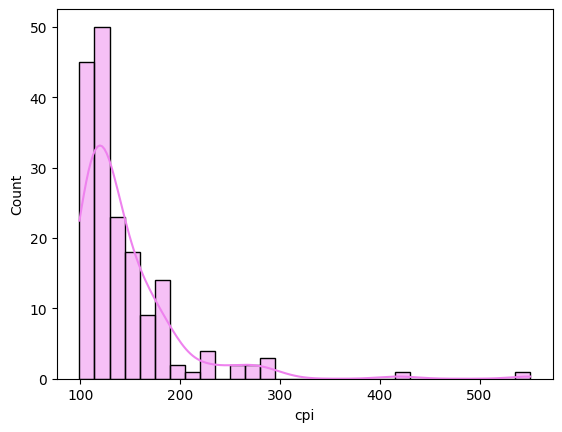

In [41]:
#Visualiza la distribución de la variable "cpi" utilizando un histograma y comenta sobre la distribución de los índices de percepción de corrupción.

sns.histplot(x = "cpi", 
             data = df, 
             color = "violet", 
             kde = True, 
             bins = 30 );